<a href="https://colab.research.google.com/github/georgezefko/Recommender_System/blob/Network_recommender/Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, our group performed a network analysis to get better understanding about the connections between the order sand the products available on Olist. 
We visualized the products and the orders as a network. The nodes of the network are the products and if two products are included in the same order, there are linked with an edge. To build it we utilized the olist_order_items_dataset which included 32951 different products and 98666 different orders. We managed to generate the network for all these products and orders but due to computatinal reasons we chose to visualize only the network for the 1000 most popular products instead. We kept all the information for the whole dataset and plotted the degree distribution to find out how many products are included in the average order.


In [ ]:
haah# Import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

# For network
import networkx as nx
from itertools import combinations,chain

# For plotting layout
import seaborn as sns
import cycler

The plotting style can be found here [cyberpunk-style-with-matplotlib](https://towardsdatascience.com/cyberpunk-style-with-matplotlib-f47404c9d4c5).

In [ ]:
# Setting up plot layouts:

plt.style.use("seaborn-darkgrid")

for p1,p2,p3 in zip(['figure.facecolor', 'axes.facecolor', 'savefig.facecolor', 'savefig.facecolor'],['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color'],['font.size', 'xtick.labelsize', 'ytick.labelsize', 'ytick.labelsize']):
    plt.rcParams[p1], plt.rcParams[p2], plt.rcParams[p3] = '#212946', '0.95', '16'

plt.rcParams['figure.figsize']=(15, 15)
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['legend.frameon'] = 'True'
plt.rcParams['legend.facecolor'] = '004466'
plt.rcParams['legend.edgecolor'] = '004466'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams["image.cmap"] = "inferno"
plt.rcParams["axes.prop_cycle"] = cycler.cycler(color=[u'#00ff00',u'#ffff00',u'#00ffff',u'#ff00ff',u'#ffaa00',u'#ff0000',u'#0000ff',u'#00aa00',u'#aaaa00',u'#038273',u'#7d0ec2',u'#822d13',u'#720303',u'#000022'])


# 1. Network

In [ ]:
data=pd.read_csv(r"C:\Users\Maria Papaioannou\Desktop\Advanced_\olist_order_items_dataset.csv")
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


To have an overview of the items and the orders they were included in, we decided to visualize them as a network. 
The graph aims to identify which items are connected the most. The nodes of the network will represent the products and the edges between them whether or not those two products were included in the same order. The graph will be simple, meaning that it will be undirected and with no self-loops.

In [ ]:
print("There are {} different products included in {} different orders.".format(len(data['product_id'].unique()),len(data['order_id'].unique())))

There are 32951 different products included in 98666 different orders.


Since the volume of the data is somewhat large, we will generate a network of the 1000 most popular products.

In [ ]:
n=1000
products_dict=dict(data['product_id'].value_counts()[:n])
popular_products=list(products_dict.keys())

data_nx=data[data['product_id'].isin(popular_products)]

In [ ]:
#n1=200
#data['product_id'].value_counts()[:n1]
data_nx.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
10,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-29 22:28:09,59.99,8.88
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77


In [ ]:
# Create an empty undirected graph
G = nx.Graph()

# Add the nodes.
G.add_nodes_from(data_nx['product_id'])
#len(list(G.nodes))


In [ ]:
uniq_order_ids = data_nx['order_id'].unique()
# len(uniq_order_ids)

In [ ]:
output_list = []

for order_id in uniq_order_ids:
    product_ids = data_nx.loc[data_nx['order_id'] == order_id, 'product_id'].tolist()
    output_list.extend(list(combinations(product_ids, 2)))

In [ ]:
# # Add the edges.

G.add_edges_from(output_list)

In [ ]:
degrees=dict(G.degree()) # Calculates the degree for each node in a dictionary

In [ ]:
# Information on the graph.

print("The network representing the 2000 most popular products includes {} nodes and {} links among them.".format(len(G.nodes),len(G.edges)))

The network representing the 2000 most popular products includes 1000 nodes and 952 links among them.


In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 952
Average degree:   1.9040


### Visualization

For the visualization of the network, we wanted to give each node size proportional to its degree. Because the average degree of the nodes was 1.9 and was not visible in the network, to generate it we multiplied each degree by 100.

In [ ]:
# kamada kawai layout
pos= nx.kamada_kawai_layout(G) 

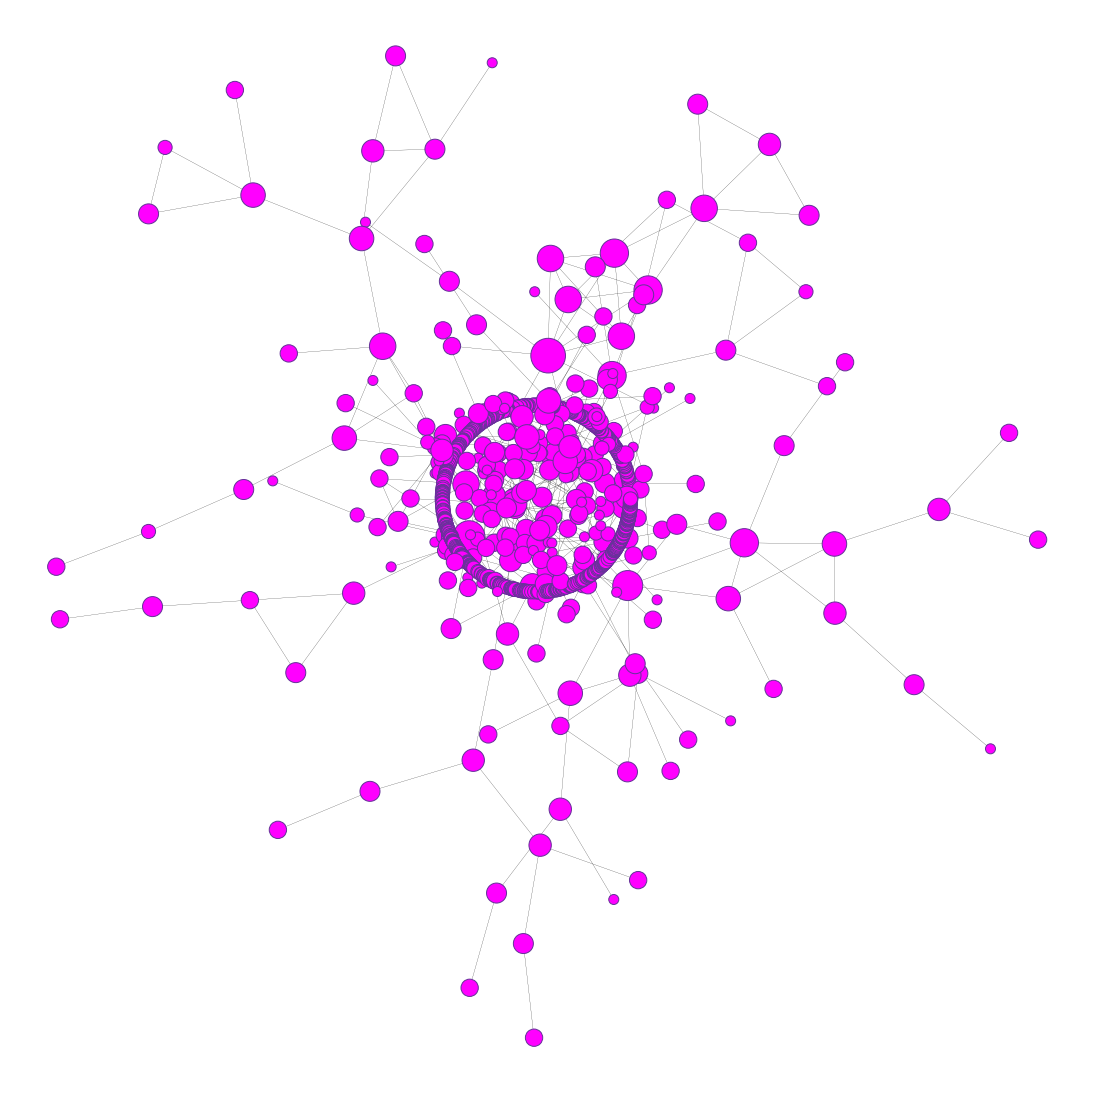

In [ ]:
# Node size according to each node's degree

plt.rcParams["figure.figsize"] = (15,15)
nx.draw(G, pos, node_size=[deg* 100 for deg in degrees.values()], node_color='fuchsia', edgecolors='rebeccapurple', width=0.2)
#nx.draw(G, pos, node_size=100, node_color='fuchsia', edgecolors='#fcff52', width=0.2)

plt.show()

### Degree distribution

The degree of a node is the number of links it has to other nodes.

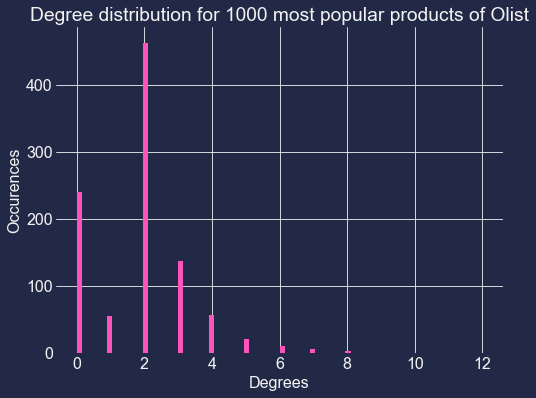

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]

plt.rcParams["figure.figsize"] = (8,6)

plt.hist(degrees,bins=80,color='#FE53BB')
plt.title('Degree distribution for 1000 most popular products of Olist')
plt.ylabel('Occurences')
plt.xlabel('Degrees')
plt.show()


In the degree distribution, it is shown that almost half of the popular products have a degree of 2. Translated in the data, that means that most of the popular products are included in the order by 3.